In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Monte Carlo Simulations for Option Pricing

- Monte Carlo simulations can be used to price options
- Assuming we have a drift rate $r$ and no dividend yield throughout the tenure of the option
- We model the stock's price following a geometric Brownian motion: $dS_{t}=r S_{t}dt+\sigma S_{t}dW_{t}$. 
- Works by simulating numerous outcomes (price evolutions) with fixed parameters like volatility
- Then take the average of the payoff and discount to today's price
- Can be applied to option models such as Black-Scholes due to random sampling from a normal distribution and  central limit theorem 
- Can be generalised to path dependent complex dervivatives and option models with non-closed solutions

## Simulating Price Evolution

- We will use it to aprroximate European call option in the Black-Scholes Model
- Assuming that our stock can be modelled using geometric Brownian motion with equation: $dS_{t}=rS_{t}dt+\sigma S_{t}dW_{t}$
- Solving the stochastic differential equation yields: $S_{t} = S_{0}e^{(r - \frac{\sigma^2}{2})t + \sigma W_{t}} $
- To model the evolution of our stock price we will discretise our solution
- Then run simulations of our price path and plot them

Text(0.5, 1.0, 'Price Evolution of Stock')

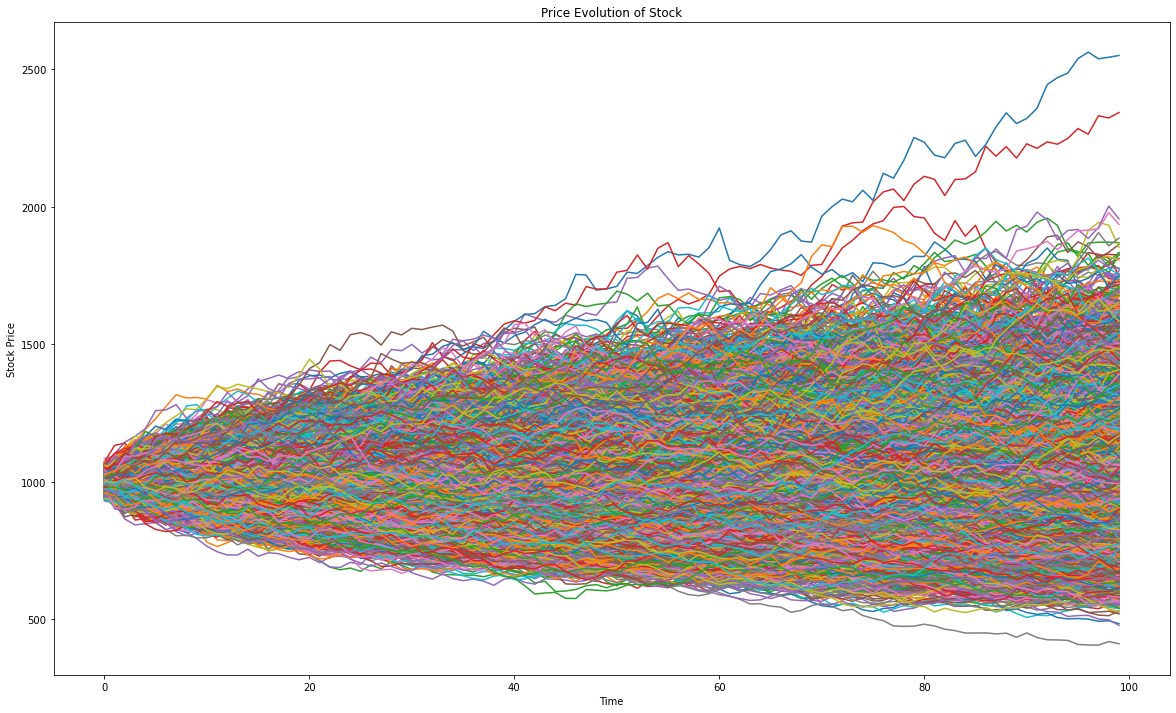

In [52]:
def gbm_evol(S_0, T, r, sigma, steps, N):
    
    '''Simulates N stock price evolutions following GBM
    
    Input:
    - S_0: Initial stock price
    - T: Maturation time
    - r: Risk-free interest rate
    - sigma: Volatility 
    - Steps: Time steps
    - N: Number of simulations 
    
    Output:
    - Returns a matrix of price evolutions'''

    # Euler discretization of our SDE
    dt = T/steps
    S = S_0 * np.exp(np.cumsum(((r - 0.5*sigma**2)*dt + sigma * np.sqrt(dt) * np.random.normal(size=(steps,N))), axis=0))
    
    return S

# Initial conditions for our case 
S_0 = 1000 
K = 1300 
T = 1
r = 0.03 
sigma = 0.2
steps = 100
N = 10000

sims = gbm_evol(S_0, T, r, sigma, steps, N)

# Call option uses maximum function to avoid negative call options
payoff = np.maximum(0, sims[-1]-K)

# Factor used to discount to today's price
avg_estimate = np.mean(payoff)*np.exp(-r*T)

# Plot of simulations
plt.figure(figsize =(20,12))
plt.plot(sims)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Price Evolution of Stock')

## Black-Scholes Model

- The Black-Scholes equation is used to price options and estimate the price of European Call Options
- Assumes that our interest rate is risk-free and that there's no dividend yield
- Code below calculates the price of the call option

In [53]:
def black_scholes_calc(S_0, T, K, sigma, r):
    
    '''Calculates the European call option, V, using the Black-Scholes Formula with inputs
    S_0: stock price
    T: maturation time
    K: exercise price
    sigma: volatility
    r: interest rate'''
    
    x_1 = 1/(sigma * np.sqrt(T)) * (np.log(S_0/K) + (r + (sigma ** 2)/2) * T)
    x_2 = 1/(sigma * np.sqrt(T)) * (np.log(S_0/K) + (r - (sigma ** 2)/2) * T)
    
    phi_1 = norm.cdf(x_1)
    phi_2 = norm.cdf(x_2)
    
    V = S_0 * phi_1 - K * np.exp(-r * T) * phi_2
    
    return V

bsp = black_scholes_calc(S_0, T, K, sigma, r)

## Analysis 


In [54]:
print(f"Simulated Price: {avg_estimate}")
print(f"Black-Scholes Price: {bsp}")
acc = 100 - 100*abs((avg_estimate-bsp)/bsp)

print(f"Accuracy: {acc}%")

Simulated Price: 13.106747193201533
Black-Scholes Price: 13.57670180300127
Accuracy: 96.53852153034805%


(0.0, 100.0)

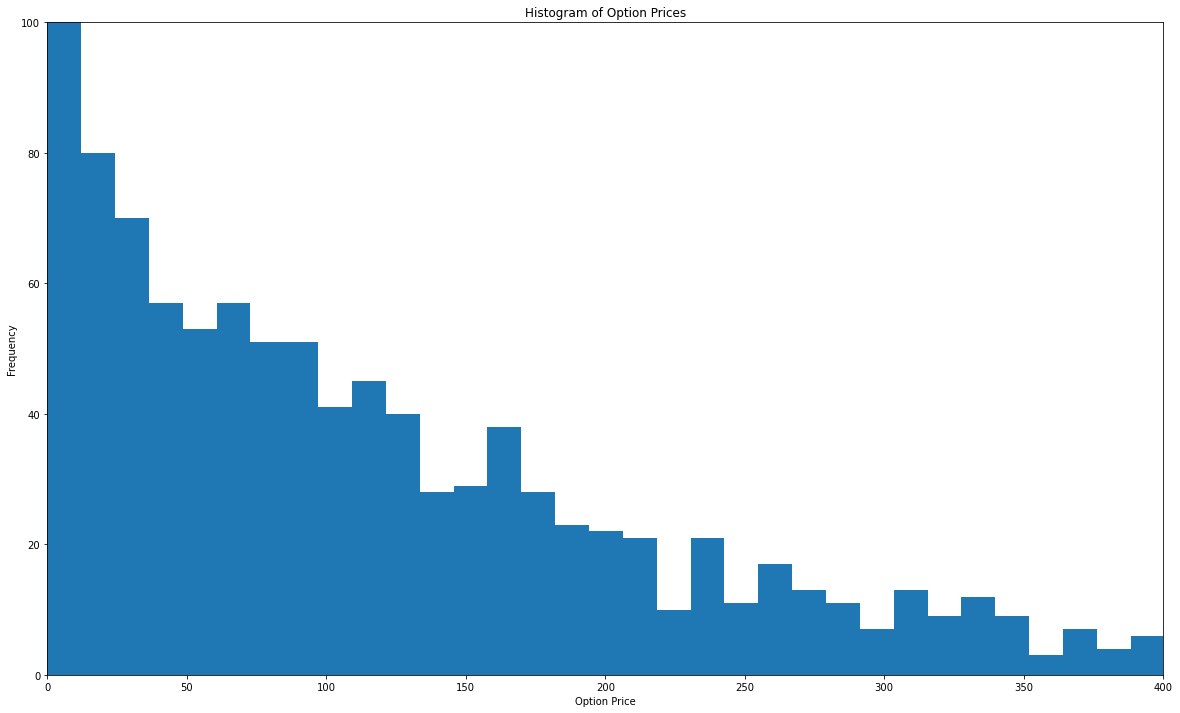

In [58]:
# Histogram plot of simulations
plt.figure(figsize=(20,12))
plt.hist(payoff*np.exp(-r*T), bins = 100)
plt.title('Histogram of Option Prices')
plt.xlabel('Option Price')
plt.ylabel('Frequency')
plt.xlim(0,400)
plt.ylim(0,100)

- Comparing our value obtained from our simulations and that of the Black-Scholes model we see a fairly decent approximation
- However this accuracy can change quite drastically for 'small' numbers of simulations
- But we can improve the accuracy by running more simulations due to the central limit theorem
- Worth noting the number of options that expire (which has been truncated)
- And the number of options with high option prices